In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                        
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, fbeta_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing dataset
Clinical_Data= pd.read_csv("Clinical_Data.csv")        
Clinical_Data.head()

,Unnamed: 0,desy_sort_key,gender_id,Diabetes,COPD,CKD,PVD,CAD,HyperTension,DiseaseType,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
0,0,118683983,F,0,0,0,0,0,1,2,...,226.513751,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130
1,1,130289775,F,1,0,0,0,0,0,1,...,212.915038,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523
2,2,108632239,F,0,0,0,0,0,1,2,...,134.289605,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951
3,3,117485425,M,0,0,0,0,0,1,2,...,255.366937,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312
4,4,129416237,F,0,0,0,0,0,1,2,...,160.118262,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217


In [3]:
Clinical_Data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 31 columns):
Unnamed: 0                     13599 non-null int64
desy_sort_key                  13599 non-null int64
gender_id                      13599 non-null object
Diabetes                       13599 non-null int64
COPD                           13599 non-null int64
CKD                            13599 non-null int64
PVD                            13599 non-null int64
CAD                            13599 non-null int64
HyperTension                   13599 non-null int64
DiseaseType                    13599 non-null int64
Age                            13599 non-null int64
race                           13599 non-null object
Treated                        13599 non-null object
Hemoglobin_A1C                 13599 non-null float64
Random_Glucose                 13599 non-null float64
Fasting_Glucose                13599 non-null float64
BMI                            13599 non-null floa

In [4]:
Clinical_Data.duplicated().sum() 

0

In [5]:
Clinical_Data['desy_sort_key'].nunique()

13599

In [6]:
Clinical_Data.describe()

,Unnamed: 0,desy_sort_key,Diabetes,COPD,CKD,PVD,CAD,HyperTension,DiseaseType,Age,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
count,13599.00000,1.359900e+04,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,...,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000
mean,6799.00000,1.212775e+08,0.033164,0.081403,0.060372,0.005736,0.034708,0.523862,3.831458,56.766453,...,191.331951,64.102900,5.482397,0.642758,0.860364,88.315721,1.125293,129.769026,19.138879,22.344230
std,3925.83749,8.700041e+06,0.179072,0.273463,0.238184,0.075520,0.183047,0.499449,2.245286,16.353595,...,43.788761,27.646785,5.224630,0.563984,0.180649,6.198480,0.659812,29.935943,3.971317,36.446322
min,0.00000,1.078548e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,...,100.083243,20.016576,0.000575,0.000062,0.000011,50.451565,0.910218,18.905459,4.355299,0.010374
25%,3399.50000,1.134126e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,45.000000,...,157.135280,57.523097,2.225297,0.362378,0.748167,89.156330,0.980277,112.563991,18.346122,11.519935
50%,6799.00000,1.213063e+08,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,57.000000,...,191.391267,63.827040,4.910732,0.521668,0.846148,89.893511,0.996609,132.715226,18.512046,15.401780
75%,10198.50000,1.287162e+08,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,70.000000,...,223.696462,69.436327,7.255807,0.697954,0.959523,90.554378,1.014713,153.061604,18.682373,19.603653
max,13598.00000,1.367601e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,85.000000,...,290.194776,296.227238,39.563789,3.985624,1.447107,93.261864,6.492862,179.980299,35.356934,309.876770


In [7]:
Clinical_Data.columns

Index(['Unnamed: 0', 'desy_sort_key', 'gender_id', 'Diabetes', 'COPD', 'CKD',
       'PVD', 'CAD', 'HyperTension', 'DiseaseType', 'Age', 'race', 'Treated',
       'Hemoglobin_A1C', 'Random_Glucose', 'Fasting_Glucose', 'BMI',
       'Systolic_BP', 'Diastolic_BP', 'HDL_C', 'LDL_C', 'Total_Cholesterol',
       'Triglycerides', 'COPDAssesstmet_Test', 'nMRC', 'FEV1/FVC_Ratio',
       'FEV1', 'serum_creatinine', 'gfr', 'blood_urea_nitrogen',
       'Albumin_to_creatinine_ratio'],
      dtype='object')

In [8]:
numerical_vars = [ 'Hemoglobin_A1C', 'Random_Glucose', 'Fasting_Glucose', 'BMI',
       'Systolic_BP', 'Diastolic_BP', 'HDL_C', 'LDL_C', 'Total_Cholesterol',
       'Triglycerides', 'COPDAssesstmet_Test', 'nMRC', 'FEV1/FVC_Ratio',
       'FEV1', 'serum_creatinine', 'gfr', 'blood_urea_nitrogen',
       'Albumin_to_creatinine_ratio']

In [9]:
target = "Treated"

In [19]:
def creating_boxplots(size, target, features, data):
    plt.figure(figsize=size)
    for i in range(len(numerical_vars)):
        plt.subplot(8, 2, i+1)
        sns.boxplot(x=target, y=features[i], data=data )

ValueError: num must be 1 <= num <= 16, not 17

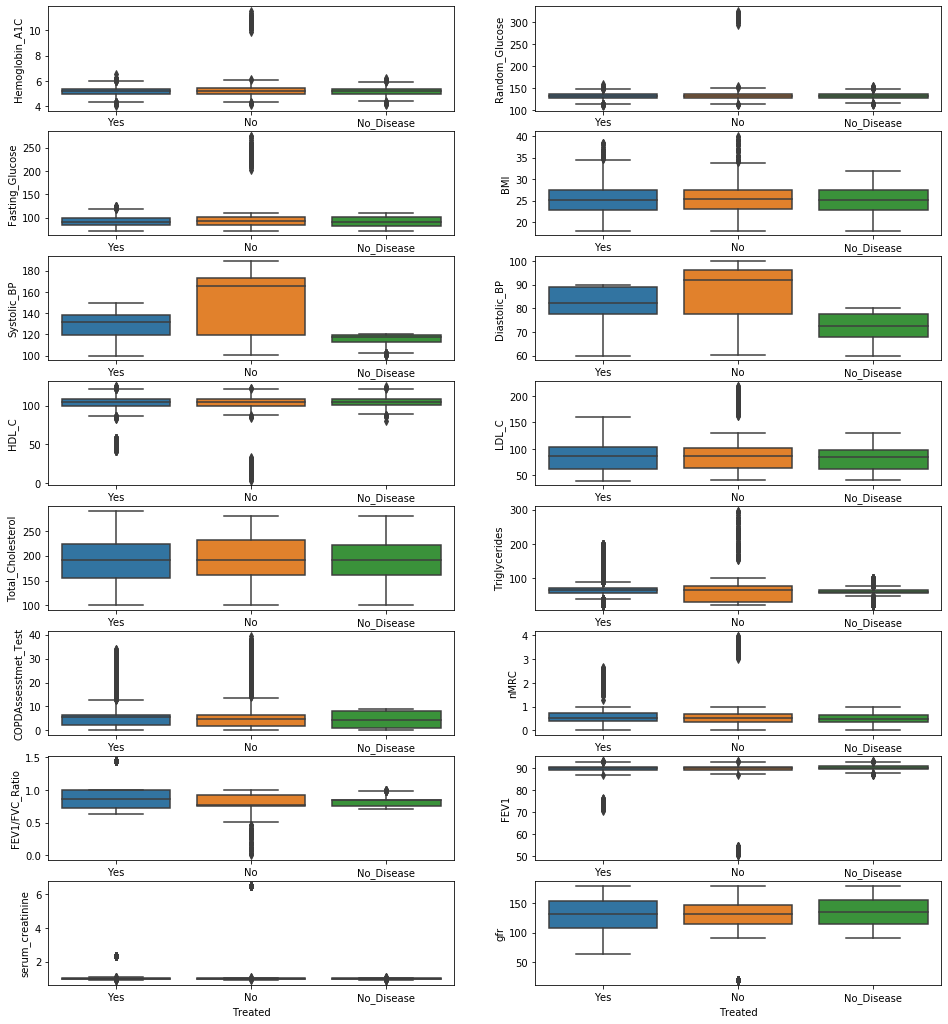

In [20]:
# Creating box plots
creating_boxplots((16,18), target, numerical_vars, Clinical_Data)
plt.tight_layout()

In [10]:
cat_cols= ['DiseaseType']

In [22]:
def countplot(features,data):
   
    for i in range(len(features)):
        fig1, ax1 = plt.subplots(figsize=(12, 10), sharex=True)
        sns.set(style="whitegrid", palette="pastel", color_codes=True)
        sns.countplot(x= data[features[i]],data=data)
        fig1.show()
        fig1.tight_layout()

C:\Users\venkata.b\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


None


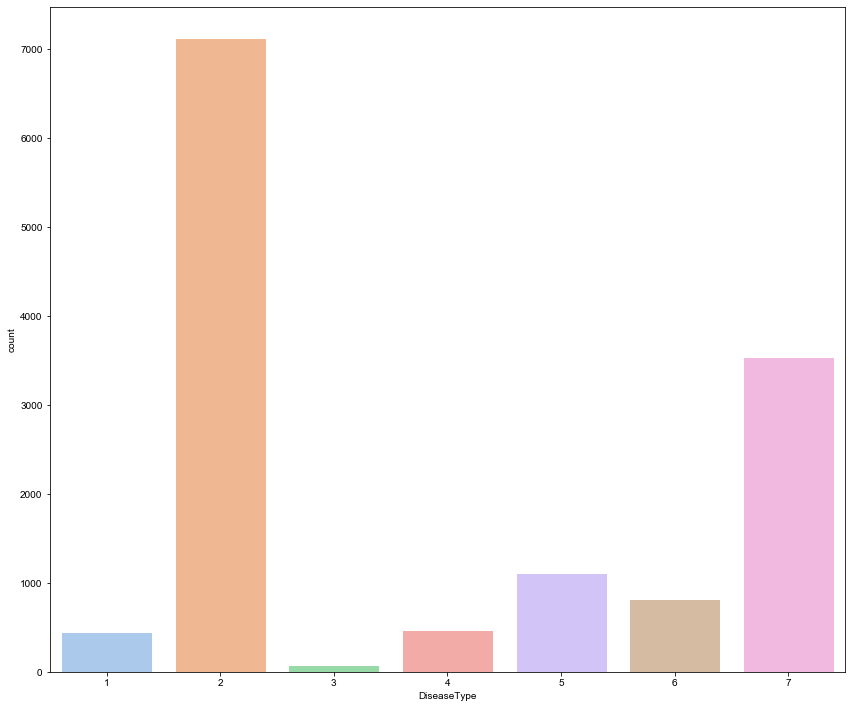

In [23]:
print(countplot(cat_cols,Clinical_Data))

In [11]:
numerical_vars_one = [ 'Hemoglobin_A1C']

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Clinical_Data[numerical_vars_one],Clinical_Data[cat_cols], test_size=0.3)

In [15]:
model.fit(X_train, y_train)

C:\Users\venkata.b\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\venkata.b\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\venkata.b\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
model.score(X_test, y_test)

0.5313725490196078

In [17]:
type(model.predict(X_test))

numpy.ndarray

In [18]:
import pickle

In [19]:
with open('clinical_data_model.pickle','wb') as f:
    pickle.dump(model,f)

In [32]:
import json

In [33]:
columns={'data_columns':[col.lower() for col in numerical_vars]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [1]:
model.predict

NameError: name 'model' is not defined